In [45]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

In [33]:
path = r'/Users/evanlynch/Developer/tennis-analysis/atp_tennis.csv'

In [34]:
df = pd.read_csv(path)

In [35]:
df.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


In [36]:
alcaraz_data = df[(df['Player_1'] == 'Alcaraz C.') | (df['Player_2'] == 'Alcaraz C.')]
sinner_data = df[(df['Player_1'] == 'Sinner J.') | (df['Player_2'] == 'Sinner J.')]

In [37]:
alcaraz_data.shape

(283, 17)

In [38]:
sinner_data.shape

(335, 17)

In [40]:
# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])
alcaraz_data['Date'] = pd.to_datetime(alcaraz_data['Date'])
sinner_data['Date'] = pd.to_datetime(sinner_data['Date'])

# Filter for last year
one_year_ago = datetime.now() - timedelta(days=365)
alcaraz_recent = alcaraz_data[alcaraz_data['Date'] >= one_year_ago].copy()
sinner_recent = sinner_data[sinner_data['Date'] >= one_year_ago].copy()

# Function to determine win/loss for a player
def get_results(data, player_name):
    results = []
    for _, row in data.iterrows():
        if row['Player_1'] == player_name:
            results.append(row['Winner'] == player_name)
        else:
            results.append(row['Winner'] == player_name)
    return pd.Series(results, index=data['Date'])

alcaraz_results = get_results(alcaraz_recent, 'Alcaraz C.')
sinner_results = get_results(sinner_recent, 'Sinner J.')

/var/folders/lq/1f0d05w114x6x06k0hn90f0c0000gn/T/ipykernel_33006/4170685125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcaraz_data['Date'] = pd.to_datetime(alcaraz_data['Date'])
/var/folders/lq/1f0d05w114x6x06k0hn90f0c0000gn/T/ipykernel_33006/4170685125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinner_data['Date'] = pd.to_datetime(sinner_data['Date'])


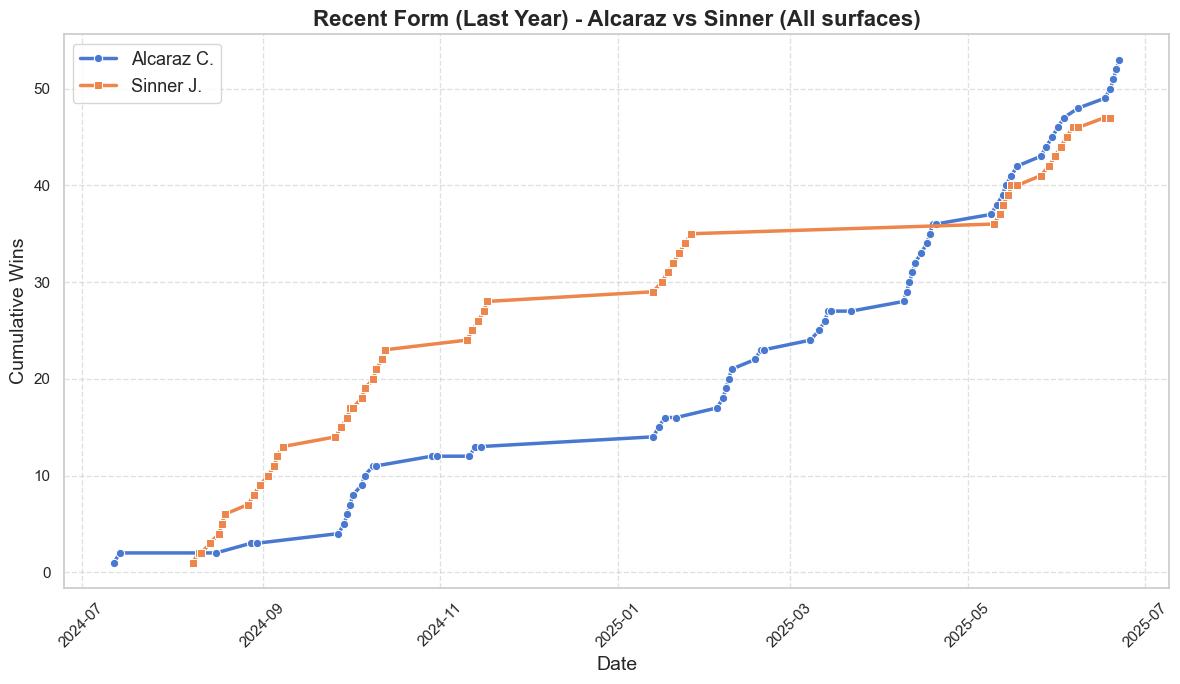

In [51]:
# Plot cumulative wins over time
alcaraz_cumwins = alcaraz_results.cumsum()
sinner_cumwins = sinner_results.cumsum()

sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(12,7))
sns.lineplot(x=alcaraz_cumwins.index, y=alcaraz_cumwins.values, label='Alcaraz C.', linewidth=2.5, marker='o')
sns.lineplot(x=sinner_cumwins.index, y=sinner_cumwins.values, label='Sinner J.', linewidth=2.5, marker='s')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Wins', fontsize=14)
plt.title('Recent Form (Last Year) - Alcaraz vs Sinner (All surfaces)', fontsize=16, fontweight='bold')
plt.legend(fontsize=13, loc='upper left', frameon=True)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

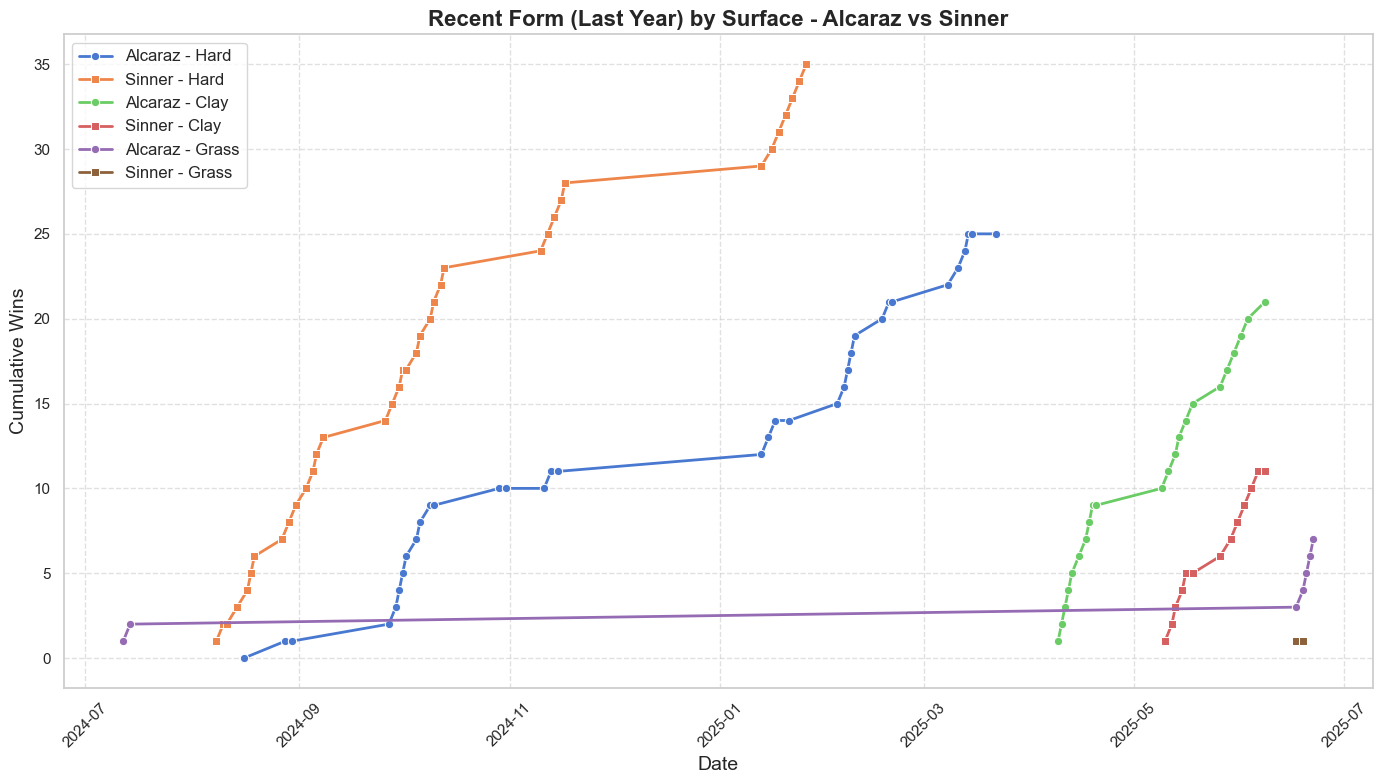

In [55]:
# Plot cumulative wins by surface for both players
surfaces = ['Hard', 'Clay', 'Grass']
plt.figure(figsize=(14,8))
sns.set_theme(style="whitegrid", palette="muted")

for surface in surfaces:
    # Filter by surface
    alc_surface = alcaraz_recent[alcaraz_recent['Surface'] == surface]
    sin_surface = sinner_recent[sinner_recent['Surface'] == surface]
    alc_results = get_results(alc_surface, 'Alcaraz C.').cumsum()
    sin_results = get_results(sin_surface, 'Sinner J.').cumsum()
    # Plot
    sns.lineplot(x=alc_results.index, y=alc_results.values, label=f'Alcaraz - {surface}', linewidth=2, marker='o')
    sns.lineplot(x=sin_results.index, y=sin_results.values, label=f'Sinner - {surface}', linewidth=2, marker='s')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Wins', fontsize=14)
plt.title('Recent Form (Last Year) by Surface - Alcaraz vs Sinner', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper left', frameon=True)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [67]:
players = ['Player_1', 'Player_2']

for player in players:
    alc_grass = df[((df['Player_1']=='Alcaraz C.') | (df['Player_2']=='Alcaraz C.')) & (df['Surface']=='Grass')]
    sin_grass = df[((df['Player_1']=='Sinner J.') | (df['Player_2']=='Sinner J.')) & (df['Surface']=='Grass')]
# Combine grass matches for both players
combined_grass = pd.concat([alc_grass, sin_grass]).drop_duplicates().reset_index(drop=True)

In [68]:
# Ensure 'Date' column is datetime
combined_grass['Date'] = pd.to_datetime(combined_grass['Date'])

# Sort by date
combined_grass_sorted = combined_grass.sort_values('Date').reset_index(drop=True)

# Split in half
split_idx = len(combined_grass_sorted) // 2
train = combined_grass_sorted.iloc[:split_idx].copy()
test = combined_grass_sorted.iloc[split_idx:].copy()

In [70]:
# Feature Engineering for Grass Court Matches
# 1. Win indicator (1 if Player_1 won, 0 otherwise)
train['Player_1_Win'] = (train['Winner'] == train['Player_1']).astype(int)
test['Player_1_Win'] = (test['Winner'] == test['Player_1']).astype(int)

# 2. Seed/rank difference (if available)
if 'Player_1_Rank' in train.columns and 'Player_2_Rank' in train.columns:
    train['Rank_Diff'] = train['Player_1_Rank'] - train['Player_2_Rank']
    test['Rank_Diff'] = test['Player_1_Rank'] - test['Player_2_Rank']

# 3. Encode round (early, mid, final)
def encode_round(round_str):
    finals = ['Final']
    semis = ['Semi-Final', 'Semifinal']
    quarters = ['Quarter-Final', 'Quarterfinal']
    if round_str in finals:
        return 3
    elif round_str in semis:
        return 2
    elif round_str in quarters:
        return 1
    else:
        return 0
train['Round_Encoded'] = train['Round'].apply(encode_round)
test['Round_Encoded'] = test['Round'].apply(encode_round)

# 4. Days since previous match for Player_1
train = train.sort_values(['Player_1', 'Date'])
train['Days_Since_Prev'] = train.groupby('Player_1')['Date'].diff().dt.days.fillna(0)
test = test.sort_values(['Player_1', 'Date'])
test['Days_Since_Prev'] = test.groupby('Player_1')['Date'].diff().dt.days.fillna(0)

# 5. Head-to-head indicator (Alcaraz vs Sinner)
def head_to_head(row):
    return int((row['Player_1'] in ['Alcaraz C.', 'Sinner J.']) and (row['Player_2'] in ['Alcaraz C.', 'Sinner J.']))
train['Alcaraz_vs_Sinner'] = train.apply(head_to_head, axis=1)
test['Alcaraz_vs_Sinner'] = test.apply(head_to_head, axis=1)

# 6. Surface win rate (historical grass win rate for each player)
def calc_grass_win_rate(df, player):
    player_matches = df[(df['Player_1'] == player) | (df['Player_2'] == player)]
    wins = (player_matches['Winner'] == player).sum()
    total = len(player_matches)
    return wins / total if total > 0 else 0
train['Player_1_Grass_WinRate'] = train['Player_1'].apply(lambda p: calc_grass_win_rate(train, p))
test['Player_1_Grass_WinRate'] = test['Player_1'].apply(lambda p: calc_grass_win_rate(test, p))
train['Player_2_Grass_WinRate'] = train['Player_2'].apply(lambda p: calc_grass_win_rate(train, p))
test['Player_2_Grass_WinRate'] = test['Player_2'].apply(lambda p: calc_grass_win_rate(test, p))

# 7. Age difference (if available)
if 'Player_1_Age' in train.columns and 'Player_2_Age' in train.columns:
    train['Age_Diff'] = train['Player_1_Age'] - train['Player_2_Age']
    test['Age_Diff'] = test['Player_1_Age'] - test['Player_2_Age']

# 8. Tournament type (Grand Slam, ATP 1000, etc.)
train['Is_Grand_Slam'] = train['Tournament'].str.contains('Wimbledon|US Open|Australian Open|Roland Garros', case=False, na=False).astype(int)
test['Is_Grand_Slam'] = test['Tournament'].str.contains('Wimbledon|US Open|Australian Open|Roland Garros', case=False, na=False).astype(int)

# Display engineered features
train.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,...,Odd_1,Odd_2,Score,Player_1_Win,Round_Encoded,Days_Since_Prev,Alcaraz_vs_Sinner,Player_1_Grass_WinRate,Player_2_Grass_WinRate,Is_Grand_Slam
3,Wimbledon,2021-06-30,Grand Slam,Outdoor,Grass,1st Round,5,Alcaraz C.,Uchiyama Y.,Alcaraz C.,...,1.44,2.75,6-3 6-7 6-2 3-6 6-3,1,0,0.0,0,0.866667,0.000000,1
4,Wimbledon,2021-07-01,Grand Slam,Outdoor,Grass,2nd Round,5,Alcaraz C.,Medvedev D.,Medvedev D.,...,11.00,1.05,4-6 1-6 2-6,0,0,1.0,0,0.866667,1.000000,1
12,Wimbledon,2022-07-03,Grand Slam,Outdoor,Grass,4th Round,5,Alcaraz C.,Sinner J.,Sinner J.,...,1.36,3.20,1-6 4-6 7-6 3-6,0,0,367.0,1,0.866667,0.647059,1
20,Queen's Club Championships,2023-06-23,ATP500,Outdoor,Grass,Quarterfinals,3,Alcaraz C.,Dimitrov G.,Alcaraz C.,...,1.36,3.20,6-4 6-4,1,0,355.0,0,0.866667,0.000000,0
21,Queen's Club Championships,2023-06-24,ATP500,Outdoor,Grass,Semifinals,3,Alcaraz C.,Korda S.,Alcaraz C.,...,1.33,3.40,6-3 6-4,1,0,1.0,0,0.866667,0.000000,0


In [71]:
# Train a Random Forest Classifier to predict Player_1_Win
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Select features for modeling
feature_cols = [
    'Rank_Diff', 'Round_Encoded', 'Days_Since_Prev', 'Alcaraz_vs_Sinner',
    'Player_1_Grass_WinRate', 'Player_2_Grass_WinRate', 'Age_Diff', 'Is_Grand_Slam'
]
# Drop features not present
feature_cols = [col for col in feature_cols if col in train.columns]

X_train = train[feature_cols]
y_train = train['Player_1_Win']
X_test = test[feature_cols]
y_test = test['Player_1_Win']

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {acc:.3f}")

Random Forest Test Accuracy: 0.903


In [74]:
# Predict Wimbledon 2025 Final: Sinner vs Alcaraz
import numpy as np

# Construct feature row for Wimbledon 2025 final
sample = {
    'Player_1': 'Sinner J.',
    'Player_2': 'Alcaraz C.',
    'Surface': 'Grass',
    'Round': 'Final',
    'Tournament': 'Wimbledon',
    'Date': pd.Timestamp('2025-07-13'),
}

# Fill engineered features
sample['Rank_Diff'] = 1  # Example: Sinner ranked 1, Alcaraz ranked 2
sample['Round_Encoded'] = 5
sample['Days_Since_Prev'] = 30 
sample['Alcaraz_vs_Sinner'] = 1

# Use historical win rates from train set
sample['Player_1_Grass_WinRate'] = train[train['Player_1']=='Sinner J.']['Player_1_Grass_WinRate'].mean()
sample['Player_2_Grass_WinRate'] = train[train['Player_2']=='Alcaraz C.']['Player_2_Grass_WinRate'].mean()

# Age difference (example: Sinner 23, Alcaraz 22)
sample['Age_Diff'] = 23 - 22

sample['Is_Grand_Slam'] = 1

# Select features
sample_X = np.array([sample[col] for col in feature_cols]).reshape(1, -1)
pred = rf.predict(sample_X)[0]

winner = sample['Player_1'] if pred == 1 else sample['Player_2']
print(f"Predicted Wimbledon 2025 Final Winner: {winner}")

Predicted Wimbledon 2025 Final Winner: Alcaraz C.


/opt/anaconda3/envs/tennis-analysis/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [87]:
print(f"Random Forest Test Accuracy: {acc:.3f}")

Random Forest Test Accuracy: 0.903


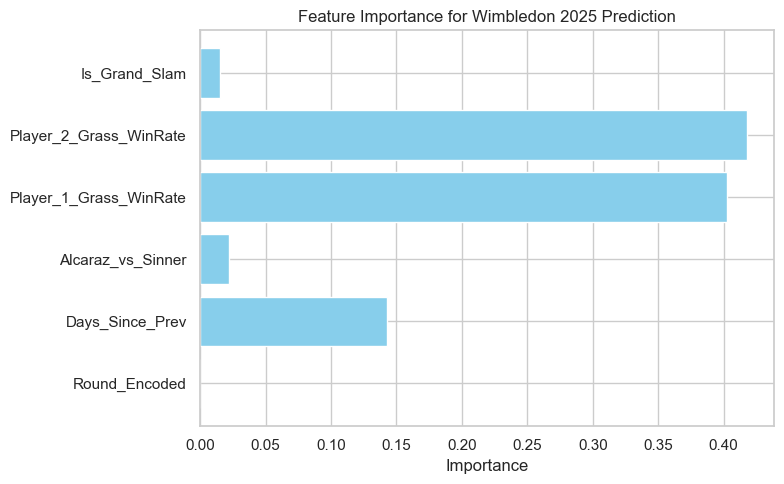

In [75]:
# Feature Importance Chart
importances = rf.feature_importances_
plt.figure(figsize=(8,5))
plt.barh(feature_cols, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Wimbledon 2025 Prediction')
plt.tight_layout()
plt.show()

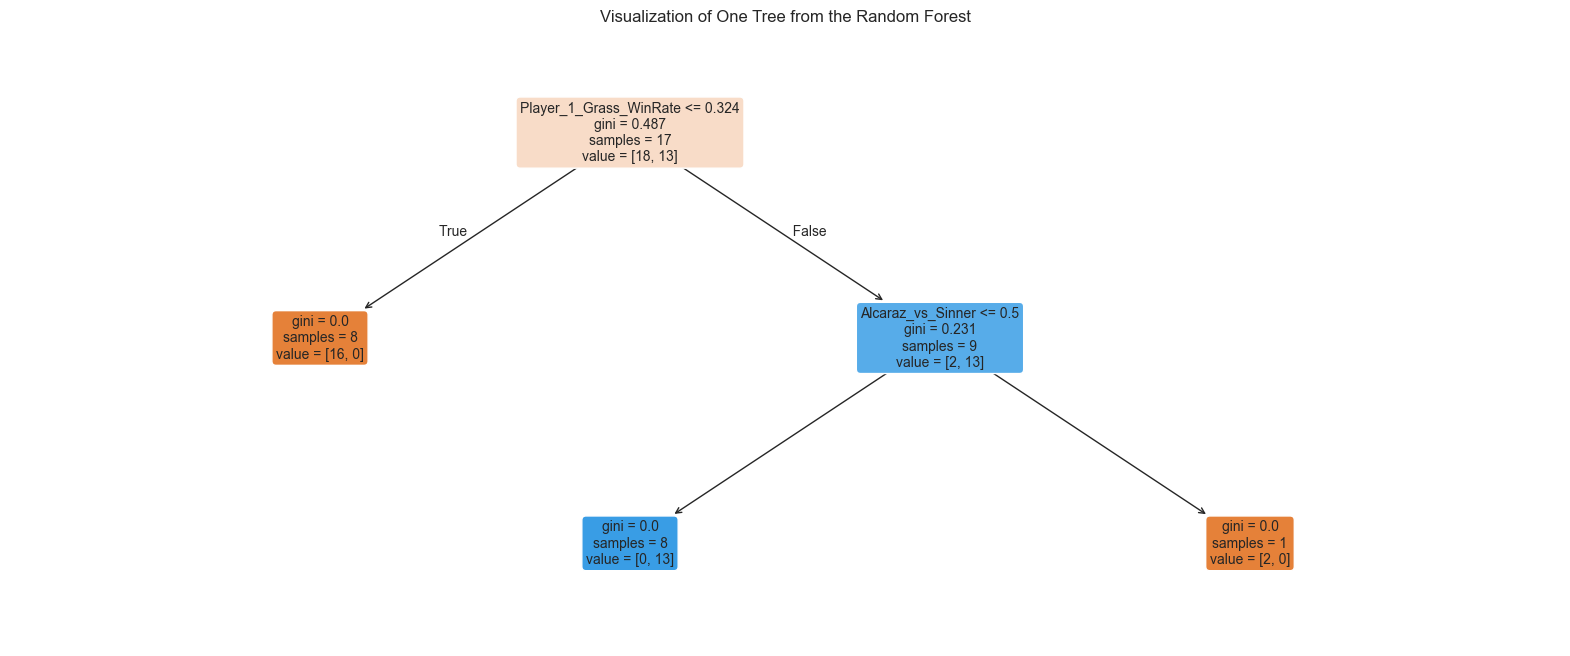

In [85]:
# Visualize one tree from the Random Forest
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 8))
plot_tree(rf.estimators_[0], feature_names=feature_cols, filled=True, rounded=True, fontsize=10)
plt.title('Visualization of One Tree from the Random Forest')
plt.show()

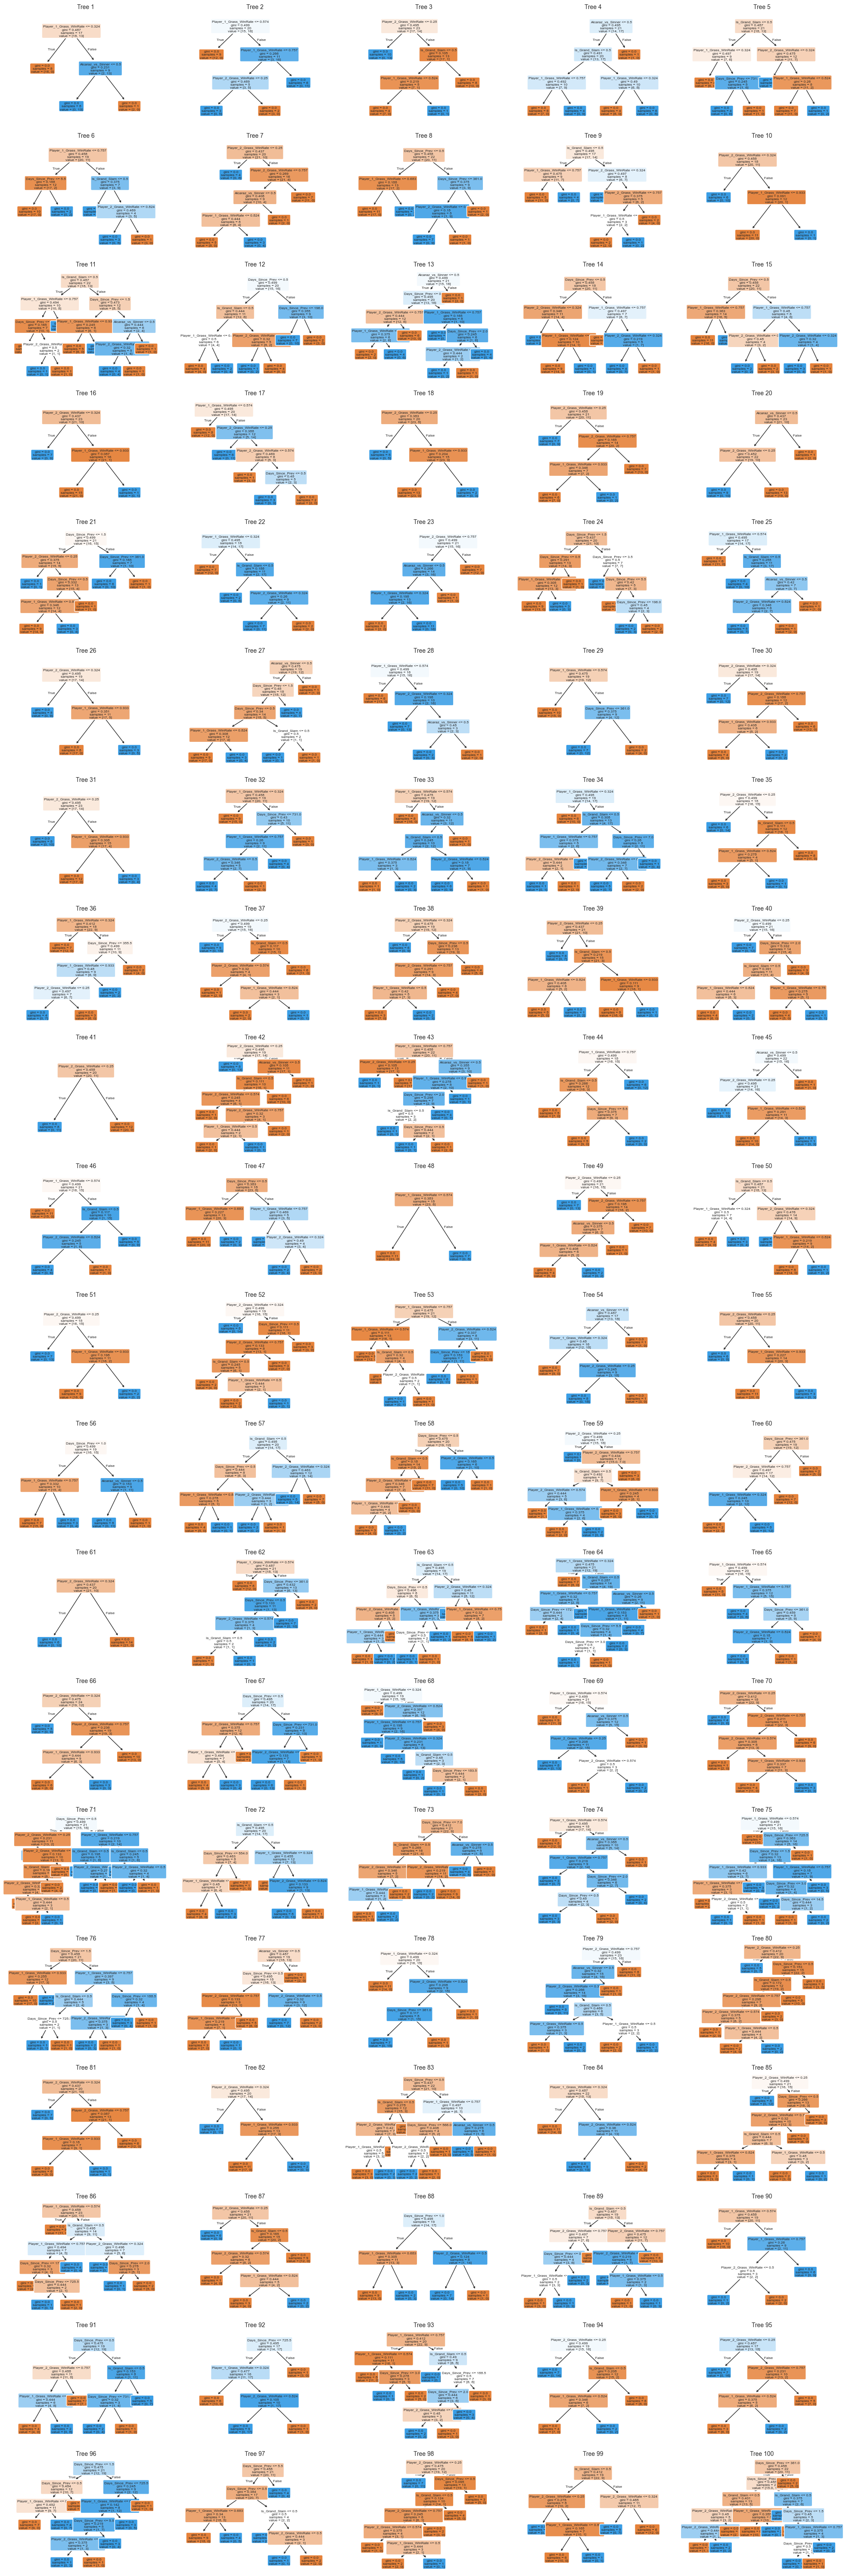

In [86]:
# Visualize all trees in the Random Forest (as subplots)
from math import ceil

n_trees = len(rf.estimators_)
cols = 5
rows = ceil(n_trees / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axes = axes.flatten()

for i, tree in enumerate(rf.estimators_):
    plot_tree(tree, feature_names=feature_cols, filled=True, rounded=True, fontsize=6, ax=axes[i])
    axes[i].set_title(f'Tree {i+1}', fontsize=10)
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

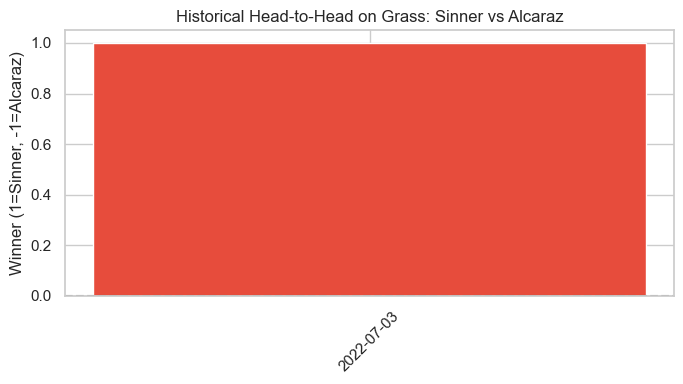

In [76]:
# Historical Head-to-Head Results on Grass
h2h_grass = combined_grass[((combined_grass['Player_1']=='Sinner J.' ) & (combined_grass['Player_2']=='Alcaraz C.')) |
                           ((combined_grass['Player_1']=='Alcaraz C.' ) & (combined_grass['Player_2']=='Sinner J.'))]

plt.figure(figsize=(7,4))
labels = []
winners = []
colors = []
for idx, row in h2h_grass.iterrows():
    labels.append(row['Date'].strftime('%Y-%m-%d'))
    winners.append(1 if row['Winner']=='Sinner J.' else -1)
    colors.append('#e74c3c' if row['Winner']=='Sinner J.' else '#3498db')
if labels:
    plt.bar(labels, winners, color=colors)
    plt.axhline(0, color='gray', linestyle='--')
    plt.ylabel('Winner (1=Sinner, -1=Alcaraz)')
    plt.title('Historical Head-to-Head on Grass: Sinner vs Alcaraz')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('No historical grass matches between Sinner and Alcaraz.')